In [1]:
import pandas as pd
import numpy as np
import json
from src.data.ScopusDataCleaner import ScopusDataCleaner
import matplotlib.pyplot as plt

# show all columns
pd.set_option("display.max_columns", None)

In [2]:
p = "../data/01-raw/scopus/articles/final_scopus_results.csv"
df = pd.read_csv(p)
print(df.shape)

(42305, 37)


In [3]:
scopus_cleaner = ScopusDataCleaner(df)
scopus_cleaner.drop_columns()
scopus_cleaner.rename_columns()
scopus_cleaner.subset_publication_type()
scopus_cleaner.subset_publication_subtype()
scopus_cleaner.remove_duplicates(column="eid")
scopus_cleaner.remove_duplicates(column="abstract")
scopus_cleaner.date_formater()
scopus_cleaner.unique_auth_year_col()

Class initialized with 42305 rows and 37 columns.
Dropped 12 columns.
#############################################
#############################################
Removing 541 Book publications
Removing 220 Book Series publications
Removing 82 Conference Proceeding publications
Removing 27 Trade Journal publications
Remaining publications: 41422
#############################################
#############################################
Removing 755 Conference paper publications
Remaining publications: 40667
#############################################
#############################################
Removed 0 duplicates based on eid.
#############################################
#############################################
Removed 24 duplicates based on abstract.
#############################################
#############################################
Date columns formatted.
New column unique_auth_year created.
#############################################
#############################

In [4]:
df = scopus_cleaner.get_dataframe()
removal_log = scopus_cleaner.get_removal_log()

In [5]:
# save df as pkl
p = "../data/02-clean/scopus_cleaned.pkl"
df.to_pickle(p)

In [6]:
# save removal log as json
p = "../output/descriptive-stats-logs/"
# Saving the dictionary to a JSON file
# Convert numpy types to Python native types
converted_dict = {
    k: (v.item() if isinstance(v, np.generic) else v) for k, v in removal_log.items()
}

# Saving the dictionary to a JSON file
with open(p + "scopus_removal_log.json", "w") as f:
    json.dump(converted_dict, f)

# Number of publications per year


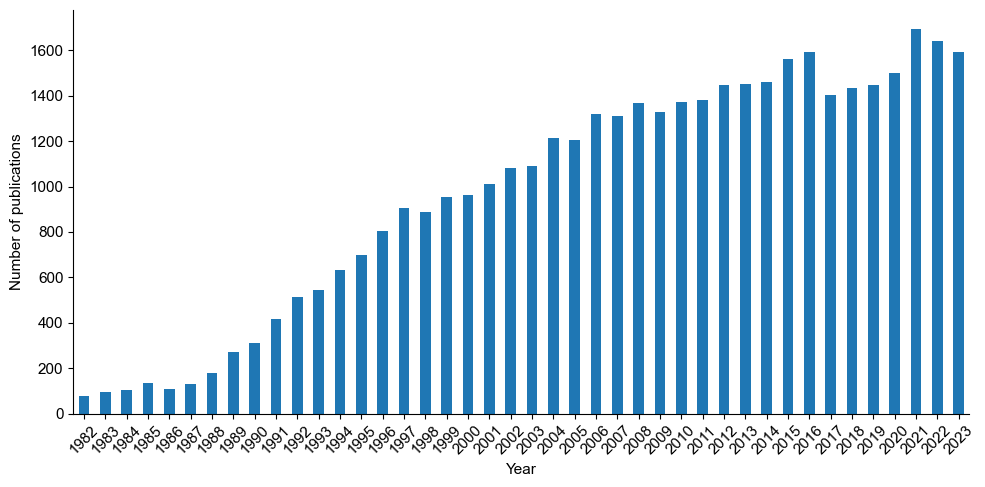

In [7]:
# use aria, font size 11
plt.rcParams.update({"font.size": 11})
plt.rcParams.update({"font.family": "Arial"})
fig, ax = plt.subplots(figsize=(10, 5))

# plot the number of publications per year
df.groupby("year").size().plot(ax=ax, kind="bar")
# ax.set_title("Number of publications per year")
# rotate x tick labeks
plt.xticks(rotation=45)
ax.set_xlabel("Year")
ax.set_ylabel("Number of publications")
plt.tight_layout()
# remove top and right borders
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.savefig("../output/figures/num_pub_year.png")

plt.show()